In [1]:
import random
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation
from IPython.display import Video
from random import choice
import pandas as pd
import math
%matplotlib inline

def MonteCarloSim(num_trials, decimalplaces = 5):
    '''returns dataframe with all the results of num_trials = trials of the Monte Carlo algo'''
    df = pd.DataFrame(columns=['x', 'y', 'r', 'Location', 'piEstimate','Error','Color'])
    df['x'] = 2*(np.random.rand(num_trials)-0.5)
    df['y'] = 2*(np.random.rand(num_trials)-0.5)
    df['r'] = np.sqrt(df['x']**2 + df['y']**2)
    df.loc[df['r'] <= 1, 'Location'] = 'Inside'
    df.loc[df['r'] > 1, 'Location'] = 'Outside'
    df.loc[df['r'] <= 1, 'Color'] = 'green'
    df.loc[df['r'] > 1, 'Color'] = 'red'
    df['piEstimate'] = 4*(df['Location'] == 'Inside').cumsum()/(df.index-1) 
    df['Error'] = 4*(df['Location'] == 'Inside').cumsum()/(df.index-1) - math.pi
    return df

In [2]:

def MonteCarloAnimation(Ntrials):
    data=MonteCarloSim(Ntrials)

    plt.rcParams['axes.facecolor'] = plt.rcParamsDefault['axes.facecolor']
    plt.rcParams['axes.edgecolor'] = plt.rcParamsDefault['axes.edgecolor']
    plt.rcParams['axes.grid'] = plt.rcParamsDefault['axes.grid']
    plt.rcParams['grid.alpha'] = plt.rcParamsDefault['grid.alpha']
    plt.rcParams['grid.color'] = plt.rcParamsDefault['grid.color']

    circle = plt.Circle((0, 0), 1.0, fc='y',alpha=0.2) ##define circle with built in circle object

    plotfunc = plt.figure(figsize=(10,10))
    plotfunc.subplots_adjust(top=0.8, wspace=0.025)
    plotfunc.tight_layout()

    ax1 = plt.subplot(111, xlim=(-1.0, 1), ylim=(-1.0, 1.0))
    ax1.add_patch(circle)

    scat = ax1.scatter(x=0, y=0, s=70, marker='o')

    # Animation update function
    def animationUpdate(k):
        x=list(data['x'])[:k]
        y = list(data['y'])[:k]
        scat.set_offsets(np.c_[x,y])
        scat.set_color(data['Color'][:k])
        return scat,

    # function for creating animation
    anim = FuncAnimation(plotfunc, animationUpdate, frames=Ntrials, interval=400, blit=True)

    # Set up formatting for the movie files
    Writer = animation.writers['ffmpeg']
    writer = Writer(fps=50, bitrate=10000)
    anim.save('animatedMonteCarlo.mp4', writer=writer)

    Video('animatedMonteCarlo.mp4')

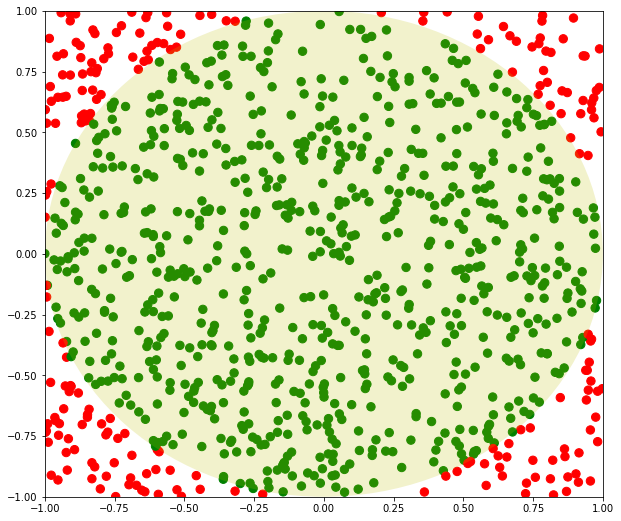

In [4]:
MonteCarloAnimation(1000)